## Multivariable Regression
Download the Excel file [here](https://ucr.fbi.gov/crime-in-the-u.s/2013/crime-in-the-u.s.-2013/tables/table-8/table-8-state-cuts/table_8_offenses_known_to_law_enforcement_new_york_by_city_2013.xls) on crime data in New York State in 2013, provided by the FBI: UCR (Thinkful mirror).

Prepare this data to model with multivariable regression (including data cleaning if necessary) according to this specification:

Propertycrime=α+Population+Population2+Murder+Robbery
Propertycrime=α+Population+Population2+Murder+Robbery
 
The 'population' variable is already set for you, but you will need to create the last three features. Robbery and Murder are currently continuous variables. For this model, please use these variables to create categorical features where values greater than 0 are coded 1, and values equal to 0 are coded 0. You'll use this data and model in a later assignment- for now, just write the code you need to get the data ready. Don't forget basic data cleaning procedures, either! Do some graphing to see if there are any anomalous cases, and decide how you want to deal with them.

In [0]:
%matplotlib inline
import pandas as pd
import numpy as np
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model

pd.options.display.float_format = '{:.3f}'.format

import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [0]:
crime_path ='https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/New_York_offenses/NEW_YORK-Offenses_Known_to_Law_Enforcement_by_City_2013%20-%2013tbl8ny.csv'
crime_data = pd.read_csv(crime_path, skiprows=4, skipfooter=3, engine='python')

In [3]:
crime_data.head(3)

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,"1,861",0,0,nan,0,0,0,12,2,10,0,0.000
1,Addison Town and Village,"2,577",3,0,nan,0,0,3,24,3,20,1,0.000
2,Akron Village,"2,846",3,0,nan,0,0,3,16,1,15,0,0.000


In [4]:
crime_data.dtypes

City                                       object
Population                                 object
Violent\ncrime                             object
Murder and\nnonnegligent\nmanslaughter      int64
Rape\n(revised\ndefinition)1              float64
Rape\n(legacy\ndefinition)2                object
Robbery                                    object
Aggravated\nassault                        object
Property\ncrime                            object
Burglary                                   object
Larceny-\ntheft                            object
Motor\nvehicle\ntheft                      object
Arson3                                    float64
dtype: object

In [0]:
def convert_number(number):
    try:
        converted = float(number.replace(',', ''))
    except:
        converted = number
    
    return converted

In [0]:
crime_data.fillna(0)
crime_data['Population'] = crime_data['Population'].apply(lambda x: convert_number(x))
crime_data['Murder'] = crime_data['Murder and\nnonnegligent\nmanslaughter'].apply(lambda x: convert_number(x))
crime_data['Robbery'] = crime_data['Robbery'].apply(lambda x: convert_number(x))
crime_data['Property\ncrime'] = crime_data['Property\ncrime'].apply(lambda x: convert_number(x))
crime_data['Larceny-\ntheft'] = crime_data['Larceny-\ntheft'].apply(lambda x: convert_number(x))

In [0]:
crime_data = crime_data.drop('Rape\n(revised\ndefinition)1', 1)

In [8]:
crime_data.describe()

,Population,Murder and nonnegligent manslaughter,Robbery,Property crime,Larceny- theft,Arson3,Murder
count,348.000,348.000,348.000,348.000,348.000,187.000,348.000
mean,40037.632,1.566,72.902,792.606,637.017,1.872,1.566
std,450037.368,18.304,1031.033,7659.725,6346.054,10.693,18.304
min,526.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,3003.000,0.000,0.000,40.500,31.000,0.000,0.000
50%,7233.500,0.000,1.000,112.500,94.000,0.000,0.000
75%,18427.500,0.000,5.000,341.000,287.250,1.000,0.000
max,8396126.000,335.000,19170.000,141971.000,117931.000,132.000,335.000


In [9]:
print('The total number of cities is', len(crime_data['City'].unique()))

The total number of cities is 348


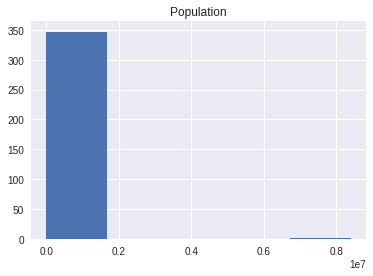

In [10]:
crime_data['Population'].hist(bins=5)
plt.title('Population')
plt.show()

median = crime_data.Population.median()
std = crime_data.Population.std()
pop_ends = median + 2* std

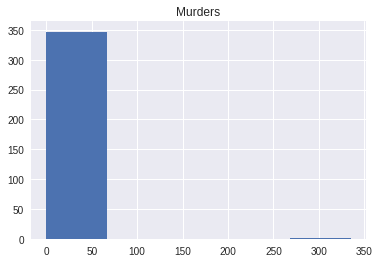

In [11]:
crime_data['Murder'].hist(bins=5)
plt.title('Murders')
plt.show()

median = crime_data.Murder.median()
std = crime_data.Murder.std()
mur_ends = median + 2* std

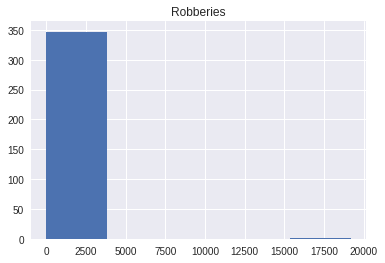

In [12]:
crime_data['Robbery'].hist(bins=5)
plt.title('Robberies')
plt.show()

median = crime_data.Robbery.median()
std = crime_data.Robbery.std()
rob_ends = median + 2* std

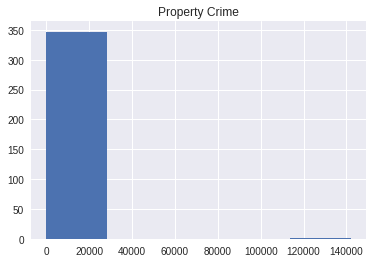

In [13]:
crime_data['Property\ncrime'].hist(bins=5)
plt.title('Property Crime')
plt.show()

median = crime_data['Property\ncrime'].median()
std = crime_data['Property\ncrime'].std()
prop_ends = median + 2* std

In [0]:
crime_data['Population'] = crime_data.Population.map(lambda x: x if x < pop_ends else None)
crime_data['Murder'] = crime_data.Murder.map(lambda x: x if x < mur_ends else None)
crime_data['Robbery'] = crime_data.Robbery.map(lambda x: x if x < rob_ends else None)
crime_data['Property\ncrime'] = crime_data['Property\ncrime'].map(lambda x: x if x < prop_ends else None)

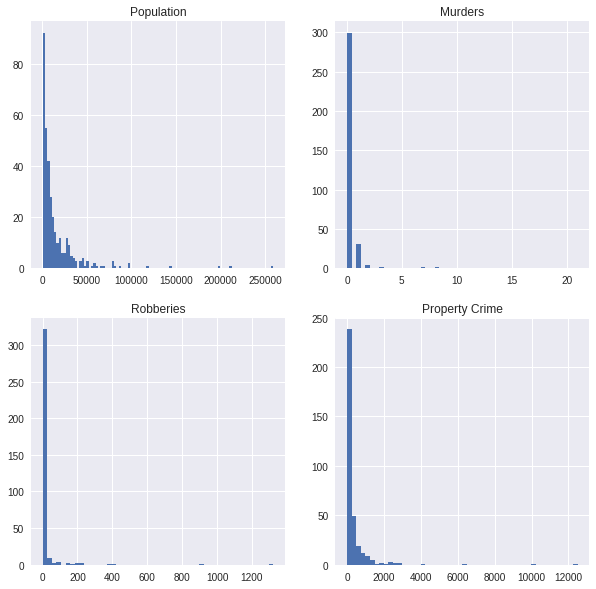

In [15]:
plt.figure(figsize=(10,10))
plt.subplot(221)
crime_data['Population'].hist(bins=100)
plt.title('Population')

plt.subplot(222)
crime_data['Murder'].hist(bins=50)
plt.title('Murders')

plt.subplot(223)
crime_data['Robbery'].hist(bins=50)
plt.title('Robberies')

plt.subplot(224)
crime_data['Property\ncrime'].hist(bins=50)
plt.title('Property Crime')

plt.show()

In [0]:
crime_data['PopSq'] = crime_data['Population']**2

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


Text(0.5,1,'Population Squared in NYC')

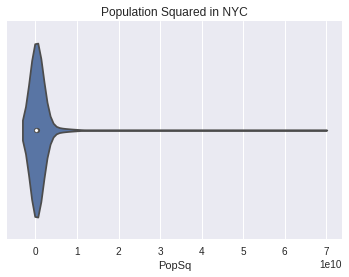

In [17]:
ax = sns.violinplot(x='PopSq', data=crime_data)
plt.title('Population Squared in NYC')

Next we convert the values in our categories into a binary solution.

In [0]:
def convert_category(number):
    value = convert_number(number)
    
    if value>0:
        return 1
    else:
        return 0

In [19]:
crime_data['Murder_categorical'] = crime_data['Murder'].apply(lambda x: convert_category(x))
crime_data['Robbery_categorical'] = crime_data['Robbery'].apply(lambda x: convert_category(x))
crime_data.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,Murder,PopSq,Murder_categorical,Robbery_categorical
0,Adams Village,1861.000,0,0,0,0.000,0,12.000,2,10.000,0,0.000,0.000,3463321.000,0,0
1,Addison Town and Village,2577.000,3,0,0,0.000,3,24.000,3,20.000,1,0.000,0.000,6640929.000,0,0
2,Akron Village,2846.000,3,0,0,0.000,3,16.000,1,15.000,0,0.000,0.000,8099716.000,0,0
3,Albany,97956.000,791,8,30,227.000,526,4090.000,705,3243.000,142,nan,8.000,9595377936.000,1,1
4,Albion Village,6388.000,23,0,3,4.000,16,223.000,53,165.000,5,nan,0.000,40806544.000,0,1


In [20]:
features = crime_data[['Population', 'PopSq', 'Murder_categorical', 'Robbery_categorical', 'Property\ncrime']].dropna()
features.head()

,Population,PopSq,Murder_categorical,Robbery_categorical,Property crime
0,1861.000,3463321.000,0,0,12.000
1,2577.000,6640929.000,0,0,24.000
2,2846.000,8099716.000,0,0,16.000
3,97956.000,9595377936.000,1,1,4090.000
4,6388.000,40806544.000,0,1,223.000
